## 1. Importing Data And Required Packages 

#### Importing Pandas , numpy ,seaborn and matplotlib

# Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely notfire and Fire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df['region']=1

In [6]:
df.loc[122:]['region']=0

In [7]:
df.drop(df.index[122],inplace=True)

#### Shape of Data

In [8]:
df.shape

(243, 15)

#### Summary of Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.4+ KB


In [10]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [11]:
df.rename(columns = {'Classes  ':'Classes'}, inplace = True)

In [12]:
convert_dict = {'Temperature': float,
                ' RH': int,
                ' Ws':int,
                'Rain ':float,
                'FFMC':float,
                'DMC':float,
                'DC':float,
                'ISI':float,
                'BUI':float,
                'FWI':float
                }
 

In [13]:
#converting Dtypes 
df = df.astype(convert_dict)
print(df.dtypes)

day             object
month           object
year            object
Temperature    float64
 RH              int32
 Ws              int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
region           int64
dtype: object


## 2. Exploring Data 

In [14]:
#define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'region']

We have 4 categorical features : ['day', 'month', 'year', 'Classes']


<AxesSubplot: >

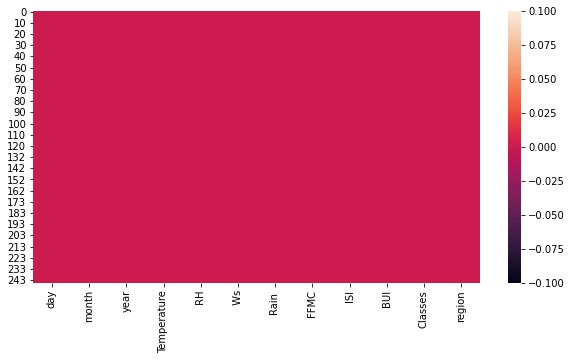

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

#### Insight


### 2.1 Univariate Analysis

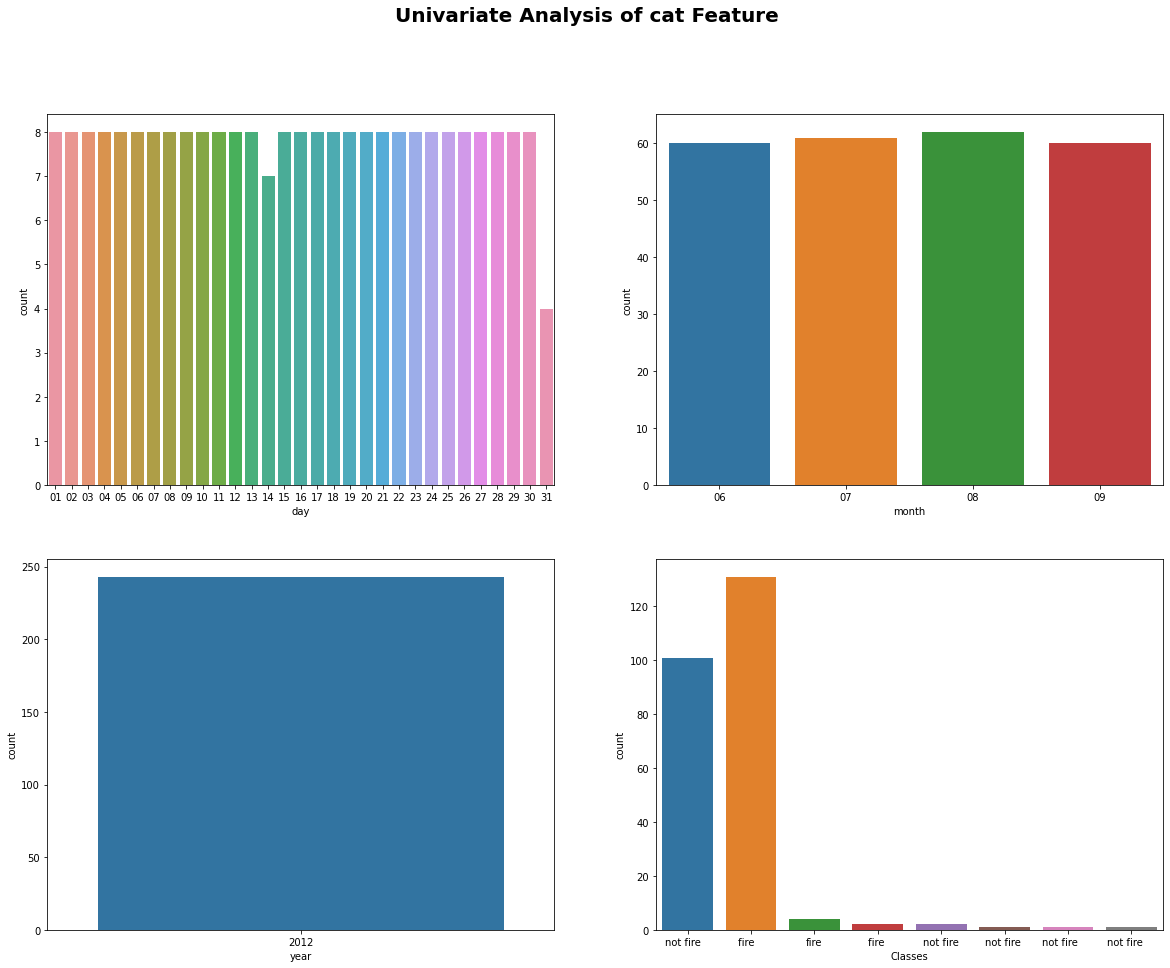

In [16]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of cat Feature',fontsize=20,fontweight='bold')
cat1 = ['day','month','year','Classes']
for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])

<AxesSubplot: xlabel='Classes', ylabel='count'>

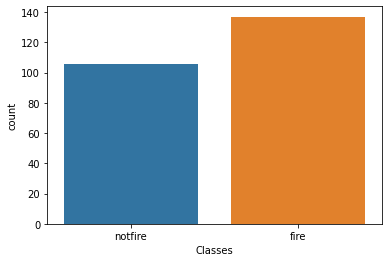

In [38]:
sns.countplot(data=df,x=df['Classes'])

In [18]:
df['Classes'] = df['Classes'].str.replace(' ','')

In [39]:
df['Classes'].value_counts()

fire       137
notfire    106
Name: Classes, dtype: int64

In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

### 2.2 Multivariate Analysis 

#### Checking multi Collinearity

In [40]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.603871,0.459789,-0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.686667,-0.353841,0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,0.008532,0.031438,0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.347484,-0.299852,0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.740007,0.592011,-0.222241
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,1.000000,0.644093,-0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.644093,1.000000,-0.089408
region,-0.269555,0.402682,0.181160,0.040013,-0.222241,-0.263197,-0.089408,1.000000


<AxesSubplot: >

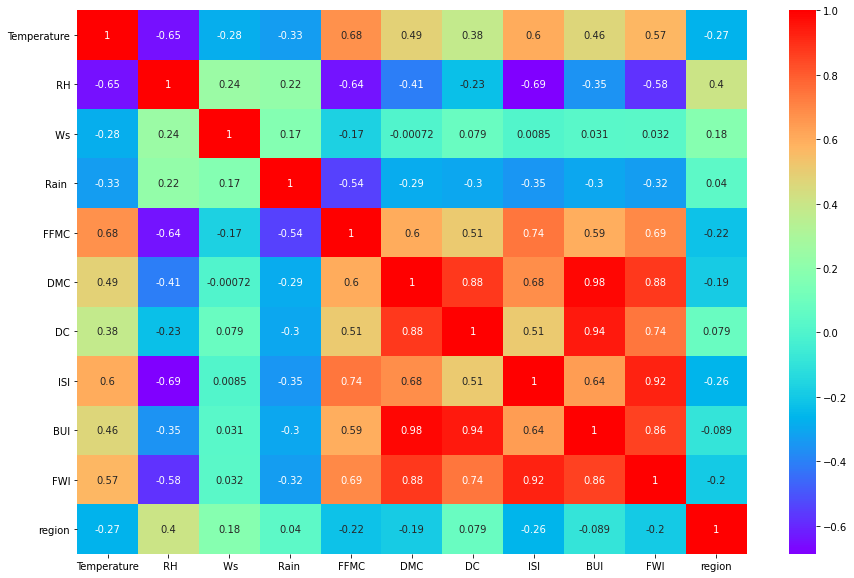

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='rainbow',annot=True)

#### Insights
1. DMC , BUI ,DC are highly Positively Correlated
2. RH and Temperature are negatively correlated
3. FWI and ISI are highly positively correlated
4. DMC and ISI are Highly correlated i.e we can drop DMC or ISI
5. BUI and DC are Highly correlated we can drop any one of them
6. ISI and FWI are hilghly correlated we can drop FWI
7. BUI and DMC are Highly Correlated we ca drop any one

In [23]:
df.drop(['DC','FWI'],axis=1,inplace=True)

In [24]:
df.drop('DMC',axis=1,inplace=True)

### 3. Visually Exploring Data 

##### Realtion Plot To get Retation Between Temperature , Rain And Region 

<Figure size 1440x1080 with 0 Axes>

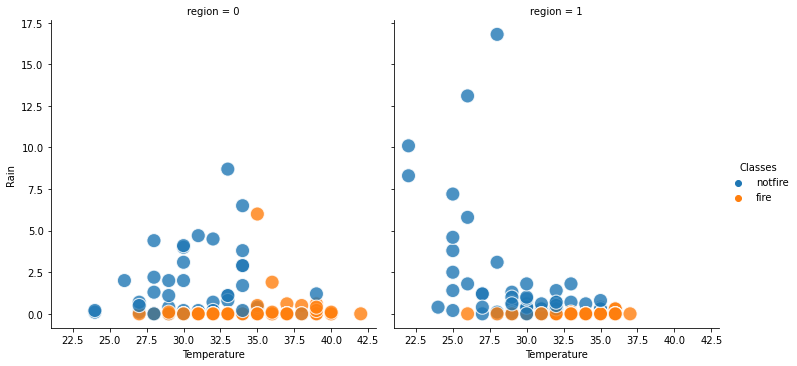

In [25]:
plt.figure(figsize=(20,15))
plt.suptitle('Relation Plots',fontsize=20,fontweight='bold')


sns.relplot(data=df, x="Temperature", y="Rain ", hue="Classes",col='region',s=200,alpha=0.8)

#### Insight
1. Region 0 has more Fires than Region 1
2. Less Rain has more Fire

##### Pair Plots of all Numrical Data

<Figure size 1080x720 with 0 Axes>

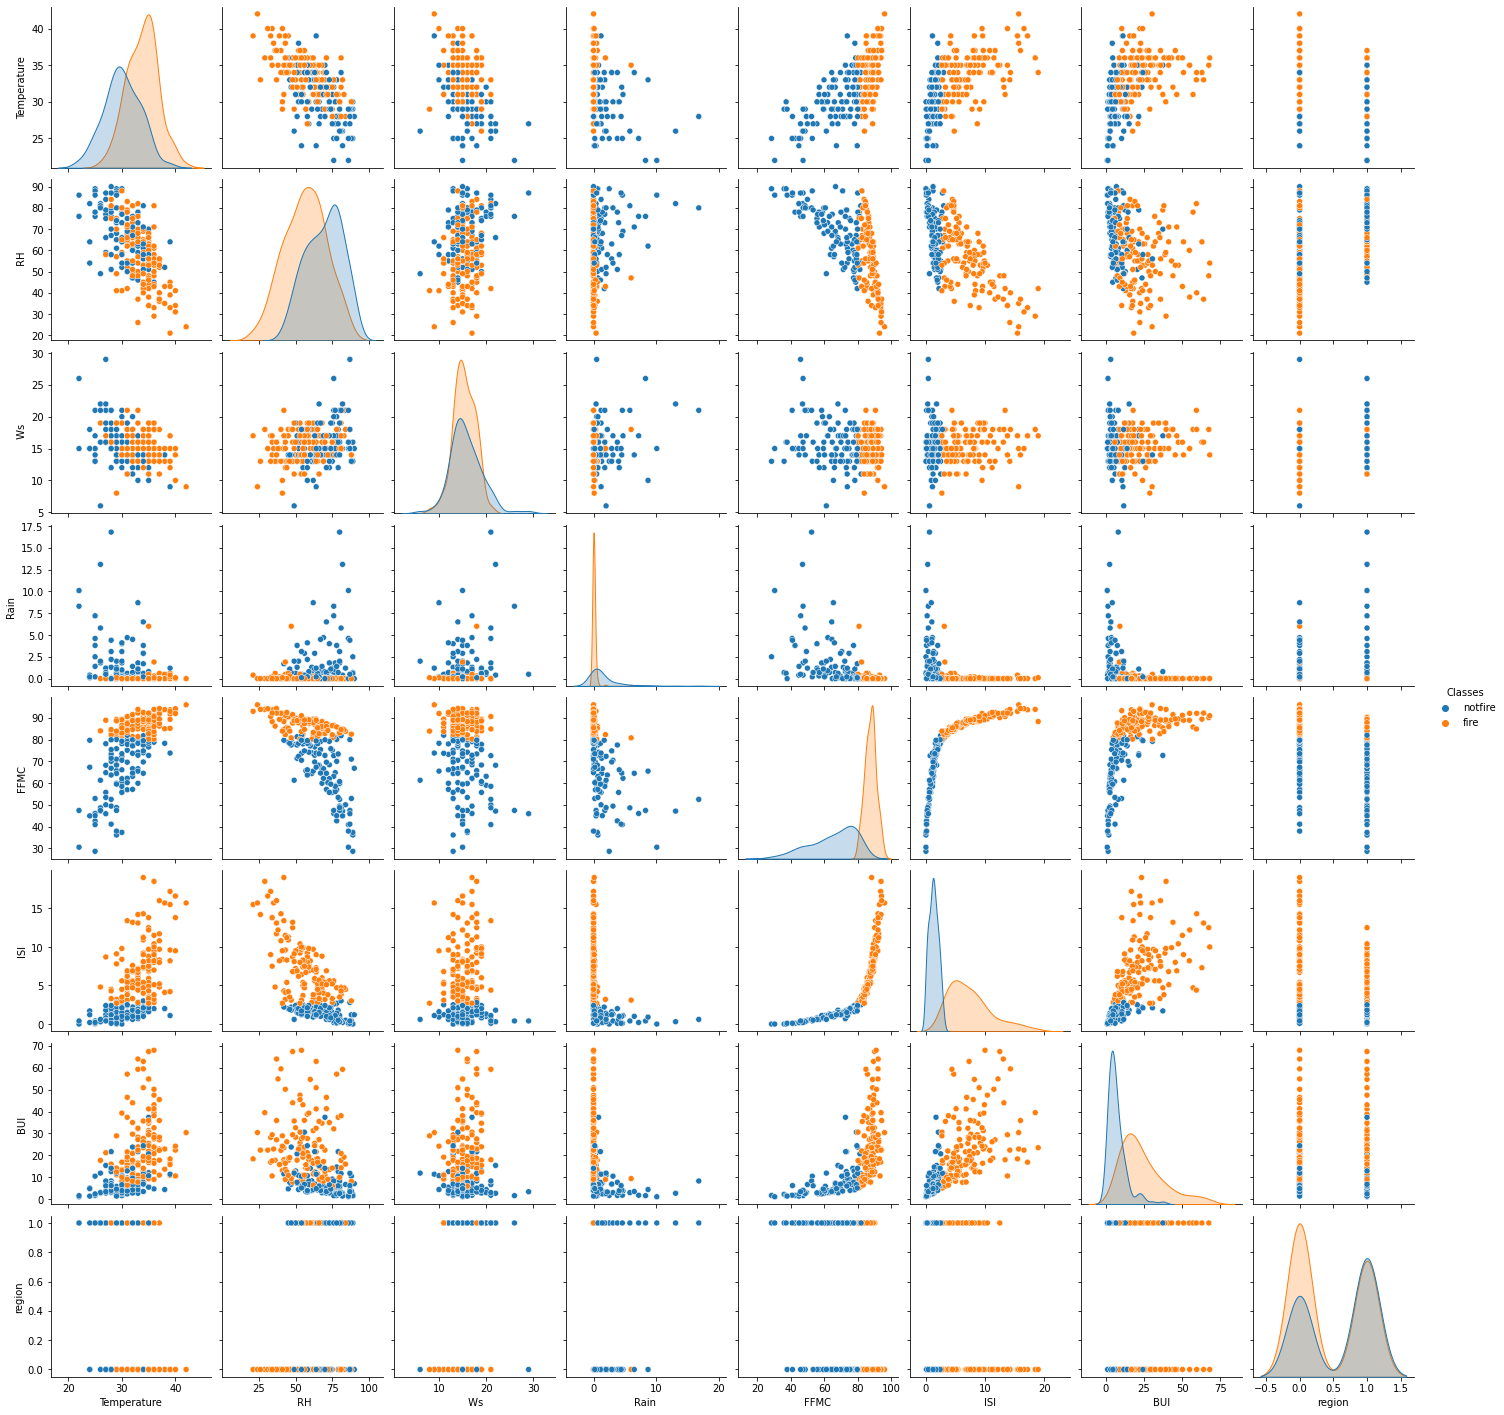

In [26]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df,hue='Classes')

##### Counting No Of fires based on rain

In [27]:
df[df['Classes']=='fire']['Rain '].value_counts()

0.0    114
0.1      9
0.3      4
0.2      3
0.5      2
0.6      2
0.4      1
1.9      1
6.0      1
Name: Rain , dtype: int64

#### Insight
There is more fire when less or 0 Rain

##### Scatter Plot To get visuall spread of  Rain,Temperature ,BUI and ISI

(0.0, 5.0)

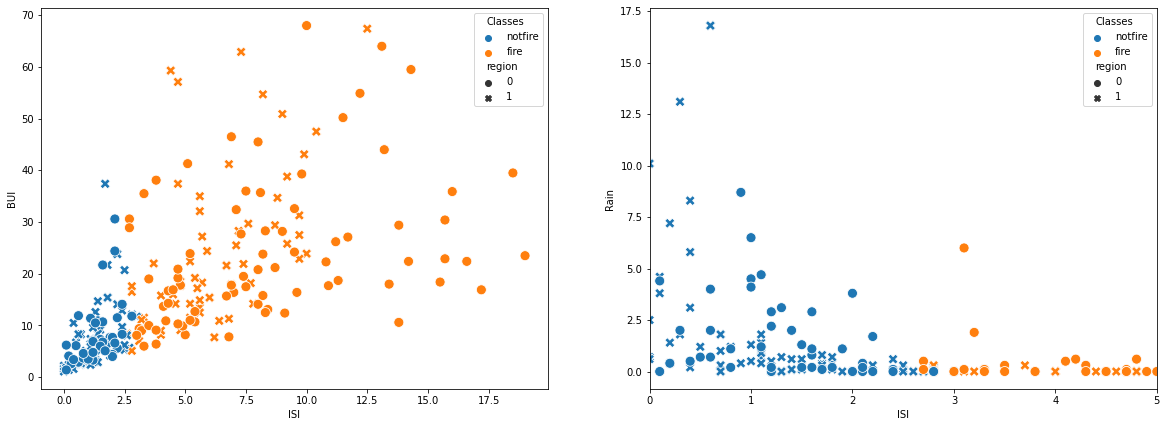

In [36]:
fig,axes=plt.subplots(1,2,figsize=(20,7))

sns.scatterplot(ax=axes[0],data=df,x='ISI',y='BUI',hue='Classes',style='region',s=100)
plt.xlim(0,5)

sns.scatterplot(ax=axes[1],data=df,x='ISI',y='Rain ',hue='Classes',style='region',s=100)
plt.xlim(0,5)


## Final Report
1. Region 0 has more fires as compared to region 1
2. There is very Large No of fires where there is no rain 
3. There are more no of Fires where ISI is greater than 3 and BUI greater than 5